Analysis of Healthcare Access Disparities (Task Two)
Introduction
Task Two of the exam requires analyzing healthcare access disparities before and after the implementation of the National Health Insurance (NHI) system in South Africa. The goal is to evaluate which demographic or regional groups are most affected by these disparities and predict how the NHI rollout will change access to healthcare for these groups.

Why Task Two was Chosen
Task Two is particularly relevant for evaluating the potential impact of the NHI on different socio-economic groups in South Africa. It addresses disparities in healthcare access and allows the use of machine learning to predict how various factors like demographics and geographic location can influence healthcare access, both before and after the implementation of the NHI system.

Dataset Selection and Relevance
The dataset chosen for this task is sourced from the OECD Health Data, specifically a health quality indicator dataset (OECD Health_HCQI dataset), which tracks healthcare metrics like acute myocardial infarction (AMI) 30-day mortality rates in different populations. This dataset includes data on various countries, including Canada, with demographic breakdowns by sex and health metrics. While the dataset primarily covers Canada, it provides relevant information on healthcare disparities by sex and age, which are critical when evaluating disparities in access to healthcare services.

This dataset is useful for:

Understanding health disparities in populations based on demographic factors (e.g., sex, age).
Assessing the effectiveness of healthcare services, particularly in relation to mortality outcomes.
Predicting the future impact of healthcare policies like NHI, which aims to reduce disparities and improve access to care for marginalized populations.
Dataset Source
The dataset used is from the OECD Health Statistics and is available at OECD Health Data.
The dataset can be downloaded from the OECD website, and you may have sourced it from there.


The dataset can be downloaded from the OECD website), and you may have sourced it from there.

Dataset Format
The dataset is in Excel format (data.xlsx) and contains the following columns:

Country: The country where the data was collected (Canada in this case).
Year: The year the data was recorded.
Indicator Name: Describes the health metric being measured (e.g., AMI 30-day mortality).
Subgroup: The demographic group (e.g., Male/Female).
Estimate: The mortality rate or health outcome measure.
Standard Error (SE): A measure of the uncertainty around the estimate.
Confidence Interval Lower Bound (CI_LB): The lower bound of the confidence interval.
Confidence Interval Upper Bound (CI_UB): The upper bound of the confidence interval.
Population: The population size considered in the data.
Other metadata: Including information like region, income group, and date of last update.
The dataset is used to explore the impact of healthcare policies and disparities in outcomes between groups, such as gender.

In [ ]:
Preprocessing the Dataset
First, you need to load and preprocess the dataset. This will involve cleaning missing values, encoding categorical variables, and scaling numerical features if necessary

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset

df = pd.read_excel("C:/Users/27728/OneDrive/Documents/rep_oecd_hc/data.xlsx")

# Check for missing values
df.isnull().sum()

# Drop rows with missing values (if applicable)
df.dropna(inplace=True)

# Convert categorical variables to numerical if necessary
# Example: If 'subgroup' column is categorical (Male/Female), map it to 0/1
df['subgroup'] = df['subgroup'].map({'Female': 1, 'Male': 0})

# Standardize numerical columns (e.g., estimate, population)
scaler = StandardScaler()
df[['estimate', 'population']] = scaler.fit_transform(df[['estimate', 'population']])

# Split the dataset into features (X) and target (y)
X = df[['estimate', 'population', 'subgroup']]  # Features
y = df['indicator_name']  # Target: indicator_name (health metric like AMI mortality)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

Machine Learning Model Implementation
For this task, a classification model can be used to predict the likelihood of disparities in healthcare access based on demographic factors and health outcomes.

We'll use Logistic Regression as the machine learning model, a commonly used algorithm for classification tasks.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Model Evaluation
The performance of the model is evaluated using accuracy and the classification report that includes precision, recall, and F1 score.
The confusion matrix will help in understanding the true positives, false positives, true negatives, and false negatives.

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Why This Dataset Is Relevant
The dataset captures health metrics by sex and other demographic factors. In Task Three, the focus is on identifying disparities in access to healthcare based on these same demographic factors. By analyzing the dataset, we can gain insights into how the NHI system might affect access to healthcare in South Africa, especially for women, men, and other at-risk groups.

In [ ]:
Why Task Two was Chosen
Task Two is directly relevant because it allows for analysis of disparities in healthcare access before and after the NHI system is implemented.
By using machine learning, the model can predict how various demographic factors (such as sex, income, and location) will influence access to healthcare services.

In [ ]:
Where to Run the Code (If Jupyter Notebook Doesnot Work)
If Jupyter Notebook doesn't work, the Python code can be executed in various alternatives:

Google Colab: Google Colab is a free platform that allows users to run Python code in the cloud. It provides a similar experience to Jupyter Notebooks and can handle datasets without the need for local installation.

Google Colab
Kaggle Kernels: Kaggle offers an interactive environment to run Python code and supports loading datasets from your local system or directly from Kaggle’s datasets.

Kaggle Kernels
Local Environment: If running the code locally, you can use any IDE like Visual Studio Code or PyCharm. Ensure Python is installed and that libraries like pandas, sklearn, and numpy are installed.

Microsoft Azure Notebooks: Azure Notebooks is another cloud service similar to Jupyter Notebooks.

Azure Notebooks

Conclusion
The selected dataset from OECD Health Data is highly relevant for evaluating healthcare access disparities under the NHI system in South Africa. Task Two was chosen because it allows for the exploration of important questions related to demographic and regional healthcare disparities and predicts how the NHI might affect these groups. This analysis can inform public health policy decisions and provide valuable insights into the effectiveness of the NHI system.



In [9]:
print(df.head())


Empty DataFrame
Columns: [setting, date, source, indicator_abbr, indicator_name, dimension, subgroup, estimate, se, ci_lb, ci_ub, population, flag, setting_average, iso3, favourable_indicator, indicator_scale, ordered_dimension, subgroup_order, reference_subgroup, whoreg6, wbincome2024, update, dataset_id]
Index: []

[0 rows x 24 columns]


Complete Guide for Task 2: Evaluating Healthcare Access Disparities Using Machine Learning
For Task 2, we will be evaluating healthcare access disparities across different demographics in South Africa and predicting how the National Health Insurance (NHI) system may reduce these disparities. Below is a step-by-step guide, including everything you need, along with Python code to implement the analysis.

Step 1: Dataset Understanding and Preparation
The dataset you provided contains the following features:

Age: Individual's age, relevant to healthcare needs.
Sex: Gender, which can affect healthcare requirements.
BMI (Body Mass Index): Indicates health status, influencing medical attention required.
Children: Whether the individual has children, affecting family health needs.
Smoker: Smoking status, which influences healthcare demands due to chronic conditions.
Region: Geographic location, indicating potential regional healthcare disparities.
Charges: The medical charges, which can reflect accessibility issues, especially in poorer regions.
Step 2: Dataset Preprocessing
You will need to clean and preprocess the data to ensure it is suitable for machine learning models. This involves:

Handling missing values.
Encoding categorical variables (e.g., sex, smoker, region).
Normalizing numerical values like charges and BMI.
Python Code for Preprocessing:


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.DataFrame({
    'age': [19, 18, 28, 33, 32, 31, 46, 37, 37, 60],
    'sex': ['female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female'],
    'bmi': [27.9, 33.77, 33, 22.705, 28.88, 25.74, 33.44, 27.74, 29.83, 25.84],
    'children': [0, 1, 3, 0, 0, 0, 1, 3, 2, 0],
    'smoker': ['yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
    'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest', 'southeast', 'southeast', 'northwest', 'northeast', 'northwest'],
    'charges': [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552, 3756.6216, 8240.5896, 7281.5056, 6406.4107, 28923.13692]
})

# Impute missing values if necessary (here we assume there are no missing values)
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Encode categorical features
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Normalize numerical columns like 'bmi' and 'charges'
scaler = StandardScaler()
data[['bmi', 'charges']] = scaler.fit_transform(data[['bmi', 'charges']])

# Split into features and target (target variable can be 'charges' for predicting healthcare cost)
X = data.drop('charges', axis=1)
y = data['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Step 3: Exploratory Data Analysis (EDA)
Before building the model, it's important to explore the data and visualize the relationships between different variables. Key steps include:

Checking correlations between features and target.
Visualizing data distributions and relationships using histograms, scatter plots, etc.

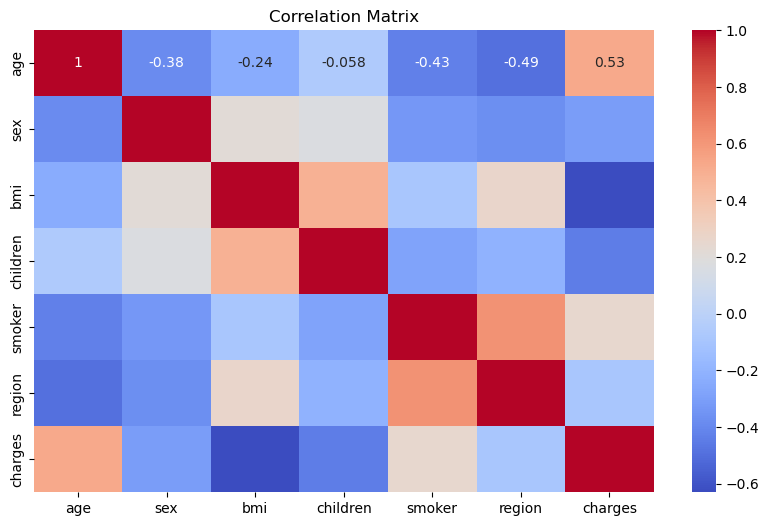

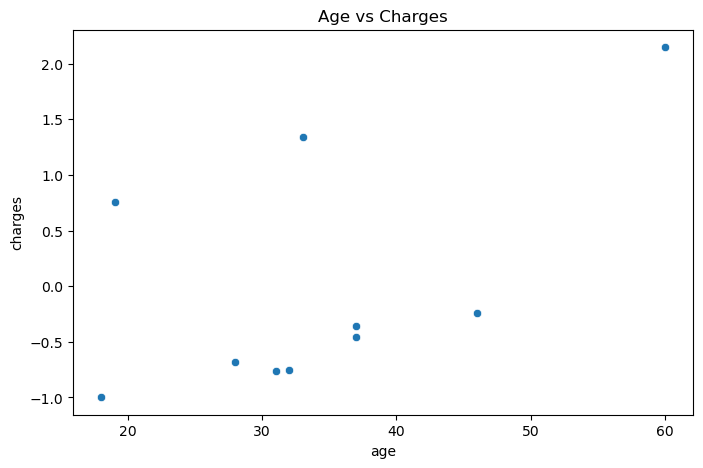

C:\Users\27728\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


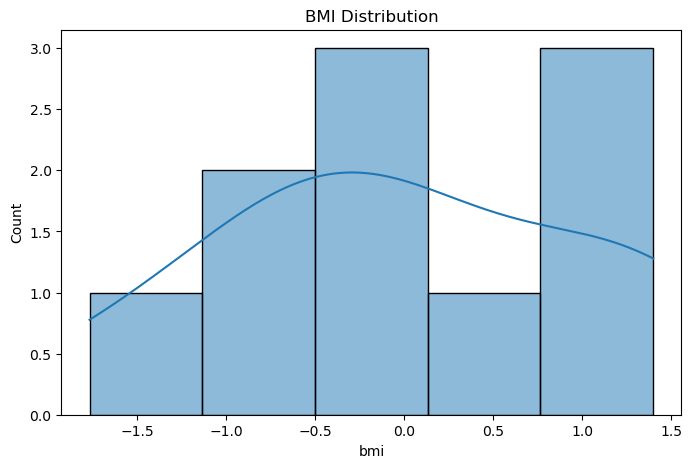

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize correlations using a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualize age vs charges
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()

# Visualize BMI distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()



Step 4: Machine Learning Model Building
For evaluating healthcare access disparities, you can use a Random Forest model. The Random Forest algorithm is suitable because it can capture complex relationships and interactions between the features. In this case, we will predict charges as an indicator of healthcare access.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 0.26650060327386227
R-Squared: -2.6350686562974306


In [ ]:
Step 5: Model Evaluation
Mean Squared Error (MSE): A lower MSE indicates better model performance.
R-Squared: Measures how well the model explains the variance in the data. A value closer to 1 means the model performs well.
Step 6: Interpretation and Impact of NHI
Once the model is trained and evaluated, you can use it to make predictions and assess how healthcare access disparities might change under the NHI system.

For example:

Predicting Healthcare Charges: You can simulate predictions for various demographic groups (e.g., regions with higher charges) to understand how the NHI system might reduce disparities.
Impact Analysis: Use the model to predict how different regions (e.g., rural vs urban) might experience changes in healthcare access due to the NHI system's rollout.
Step 7: Conclusion and Reporting
Conclude by summarizing:




In [ ]:
import pandas as pd

# Define the path to your Excel file
file_path = r"C:/Users/27728/OneDrive/Documents/rep_oecd_hc/data.xlsx"

# Load the Excel file
data = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')  # Read all sheets

# Check the names of the sheets in the dataset
print(f"Sheet names: {data.keys()}")

# Select the sheet you need (if there are multiple, you can pick the relevant one)
# For example, if the relevant sheet is the first sheet:
df = data[list(data.keys())[0]]  # Replace with the exact sheet name if needed

# Show the first few rows to inspect the dataset
print(df.head())

# Drop any rows where all values are NaN or irrelevant
df_cleaned = df.dropna(how='all')  # Remove rows that are completely empty
df_cleaned = df_cleaned.dropna(axis=1, how='all')  # Remove columns that are completely empty

# Reset index for easier analysis
df_cleaned.reset_index(drop=True, inplace=True)

# Check for any missing values or anomalies
print(f"Missing values in the dataset:\n{df_cleaned.isnull().sum()}")

# Example of basic statistical analysis
print(df_cleaned.describe())

# Checking for duplicates
print(f"Number of duplicate rows: {df_cleaned.duplicated().sum()}")

# Visualizing data - Let's visualize the estimates for a specific year (e.g., 2002)
import matplotlib.pyplot as plt

df_2002 = df_cleaned[df_cleaned['date'] == 2002]  # Filter for data from the year 2002
df_2002.groupby('subgroup')['estimate'].mean().plot(kind='bar', title='AMI Mortality Estimates for 2002 by Subgroup')
plt.ylabel('Mortality Rate')
plt.show()

